## Logistic Regression:


### 1.Different thresholds

- Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall
- Do the same analysis for other columns

- Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

- Plot ROC Curves for each model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.Type.value_counts().sort_index()
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

,count
household,
0,163
1,51


In [ ]:
glass.household.value_counts(normalize=True)

,proportion
household,
0,0.761682
1,0.238318


In [ ]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_


(array([[3.11482147]]), array([-6.00880515]))

In [ ]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0.006027
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0.007035
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.010510
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.010510
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0.011888


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define thresholds
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

for thresh in thresholds:
    # Predict class based on custom threshold
    preds_thresh = (glass['household_pred_prob'] >= thresh).astype(int)

    # Calculate metrics
    acc = accuracy_score(y, preds_thresh)
    prec = precision_score(y, preds_thresh)
    rec = recall_score(y, preds_thresh)

    print(f"Threshold: {thresh}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print("-" * 30)


Threshold: 0.1
Accuracy: 0.491
Precision: 0.309
Recall: 0.922
------------------------------
Threshold: 0.3
Accuracy: 0.864
Precision: 0.720
Recall: 0.706
------------------------------
Threshold: 0.5
Accuracy: 0.869
Precision: 0.897
Recall: 0.510
------------------------------
Threshold: 0.7
Accuracy: 0.836
Precision: 1.000
Recall: 0.314
------------------------------
Threshold: 0.9
Accuracy: 0.799
Precision: 1.000
Recall: 0.157
------------------------------


As the threshold decreases, the recall score increases because the model is more likely to predict an observation as 1. However, the precision tends to decrease.

### 2.Other columns


=== Feature: RI ===
Threshold: 0.1
Accuracy: 0.238 | Precision: 0.238 | Recall: 1.000
Threshold: 0.3
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.5
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.7
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.9
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

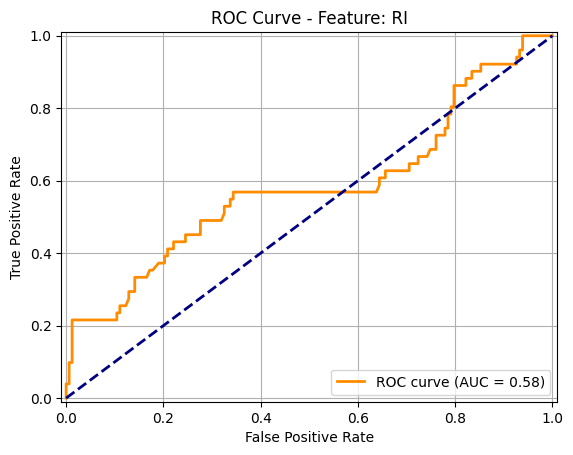



=== Feature: Na ===
Threshold: 0.1
Accuracy: 0.425 | Precision: 0.275 | Recall: 0.863
Threshold: 0.3
Accuracy: 0.827 | Precision: 0.625 | Recall: 0.686
Threshold: 0.5
Accuracy: 0.855 | Precision: 0.857 | Recall: 0.471
Threshold: 0.7
Accuracy: 0.804 | Precision: 1.000 | Recall: 0.176
Threshold: 0.9
Accuracy: 0.771 | Precision: 1.000 | Recall: 0.039


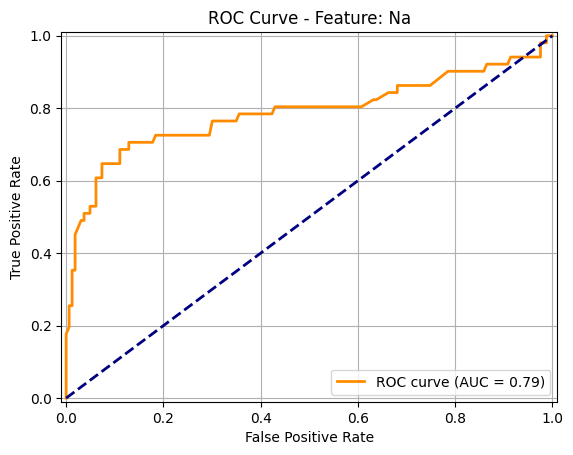



=== Feature: Mg ===
Threshold: 0.1
Accuracy: 0.879 | Precision: 0.676 | Recall: 0.941
Threshold: 0.3
Accuracy: 0.907 | Precision: 0.792 | Recall: 0.824
Threshold: 0.5
Accuracy: 0.879 | Precision: 0.778 | Recall: 0.686
Threshold: 0.7
Accuracy: 0.879 | Precision: 0.791 | Recall: 0.667
Threshold: 0.9
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


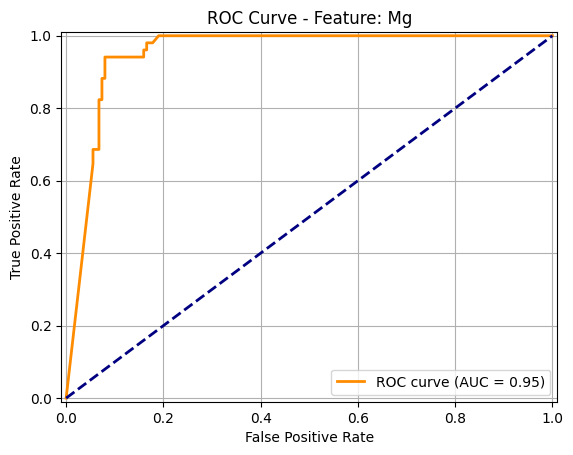



=== Feature: Al ===
Threshold: 0.1
Accuracy: 0.491 | Precision: 0.309 | Recall: 0.922
Threshold: 0.3
Accuracy: 0.864 | Precision: 0.720 | Recall: 0.706
Threshold: 0.5
Accuracy: 0.869 | Precision: 0.897 | Recall: 0.510
Threshold: 0.7
Accuracy: 0.836 | Precision: 1.000 | Recall: 0.314
Threshold: 0.9
Accuracy: 0.799 | Precision: 1.000 | Recall: 0.157


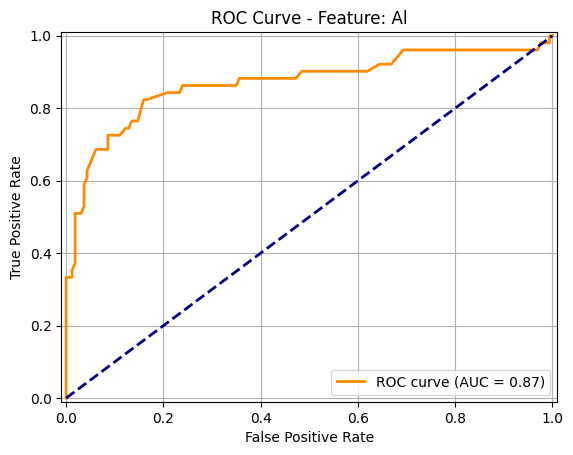



=== Feature: Si ===
Threshold: 0.1
Accuracy: 0.229 | Precision: 0.226 | Recall: 0.922
Threshold: 0.3
Accuracy: 0.804 | Precision: 0.737 | Recall: 0.275
Threshold: 0.5
Accuracy: 0.771 | Precision: 1.000 | Recall: 0.039
Threshold: 0.7
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.9
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


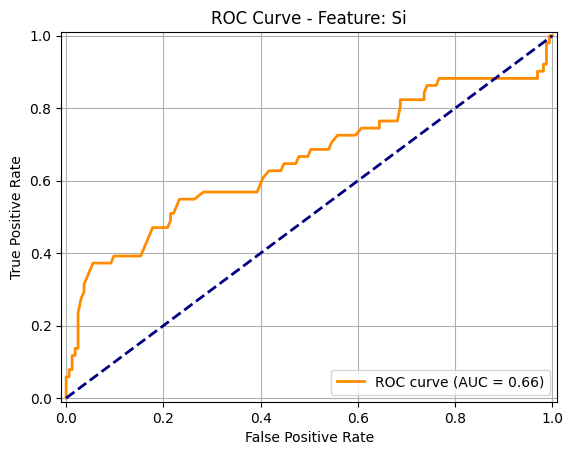



=== Feature: K ===
Threshold: 0.1
Accuracy: 0.238 | Precision: 0.238 | Recall: 1.000
Threshold: 0.3
Accuracy: 0.776 | Precision: 1.000 | Recall: 0.059
Threshold: 0.5
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.7
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.9
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


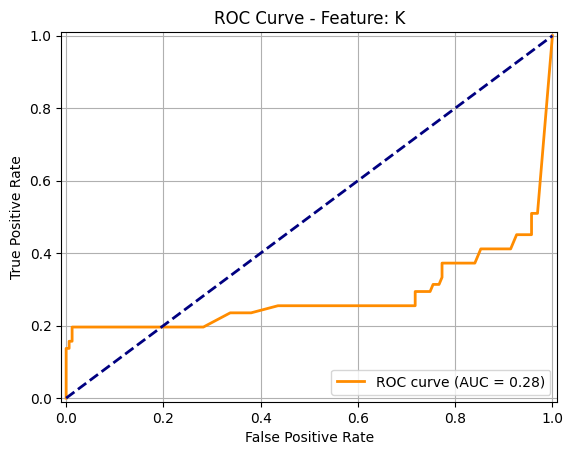



=== Feature: Ca ===
Threshold: 0.1
Accuracy: 0.238 | Precision: 0.238 | Recall: 1.000
Threshold: 0.3
Accuracy: 0.743 | Precision: 0.000 | Recall: 0.000
Threshold: 0.5
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.7
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.9
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


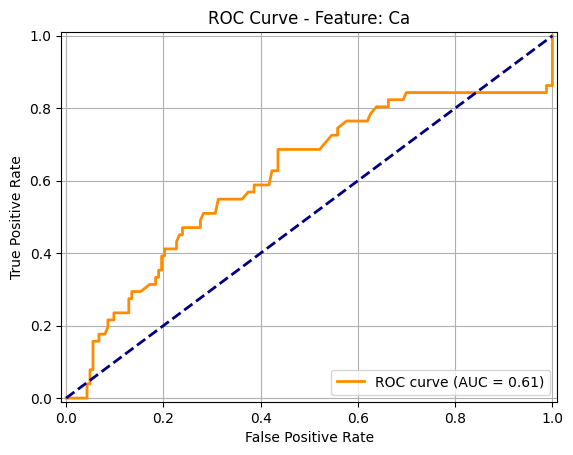



=== Feature: Ba ===
Threshold: 0.1
Accuracy: 0.238 | Precision: 0.238 | Recall: 1.000
Threshold: 0.3
Accuracy: 0.879 | Precision: 0.931 | Recall: 0.529
Threshold: 0.5
Accuracy: 0.836 | Precision: 0.900 | Recall: 0.353
Threshold: 0.7
Accuracy: 0.827 | Precision: 0.938 | Recall: 0.294
Threshold: 0.9
Accuracy: 0.813 | Precision: 0.923 | Recall: 0.235


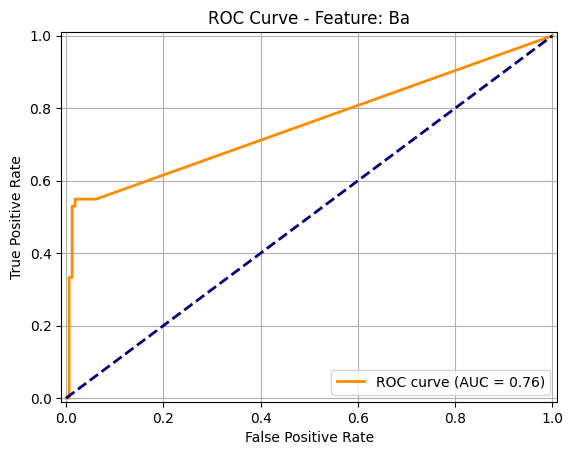



=== Feature: Fe ===
Threshold: 0.1
Accuracy: 0.238 | Precision: 0.238 | Recall: 1.000
Threshold: 0.3
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.5
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.7
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000
Threshold: 0.9
Accuracy: 0.762 | Precision: 0.000 | Recall: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

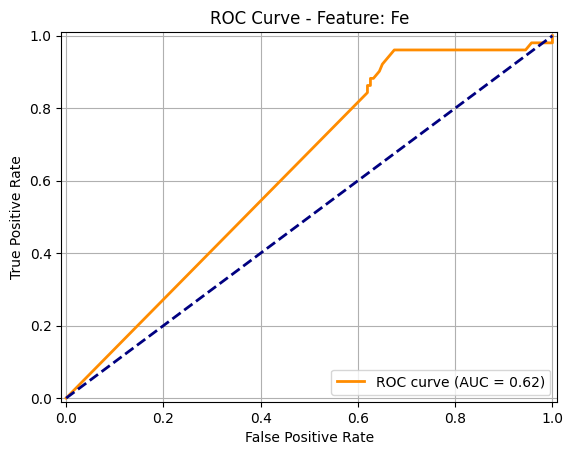

In [ ]:
from sklearn.metrics import roc_curve, auc

for feature in glass.columns[:-3]:
    print(f"=== Feature: {feature} ===")
    X= np.array(glass[feature]).reshape(-1,1)
    y = glass.household

    logreg = LogisticRegression()
    logreg.fit(X,y)

    pred_probs = logreg.predict_proba(X)[:, 1]

    # Define thresholds
    thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

    for thresh in thresholds:
        # Predict class based on custom threshold
        preds_thresh = (pred_probs >= thresh).astype(int)

        # Calculate metrics
        acc = accuracy_score(y, preds_thresh)
        prec = precision_score(y, preds_thresh)
        rec = recall_score(y, preds_thresh)
        print(f"Threshold: {thresh}")
        print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f}")

    # plot ROC curve
    fpr, tpr, _ = roc_curve(y, pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Feature: {feature}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print("\n" + "="*40 + "\n")

The model using Mg has the highest AUC of 0.95, meaning this feature is highly effective in distinguishing the glass type. On the other hand, Feature K has the lowest AUC of 0.28, indicating that it is not a strong predictor for identifying the glass type.


### 3.LR with all features



Accuracy: 0.944 | Precision: 0.898 | Recall: 0.863


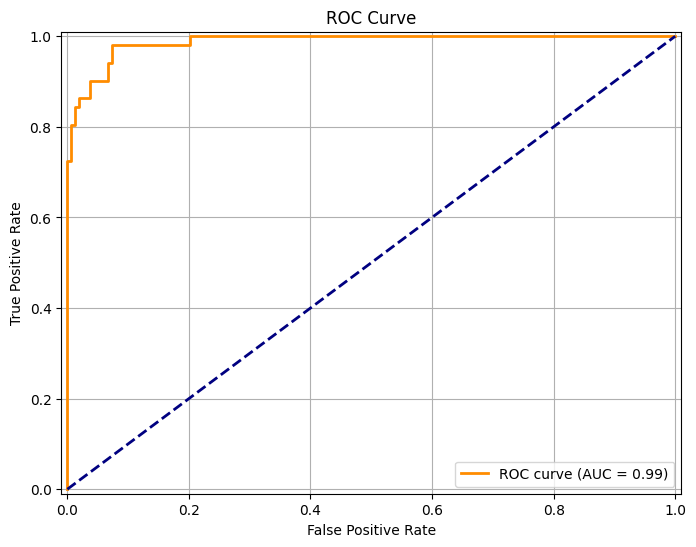

AUC for the model with all features: 0.99


In [ ]:
from sklearn.preprocessing import StandardScaler

X = glass.iloc[:, :-3].values
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression()
logreg.fit(X_scaled, y)

pred_probs = logreg.predict_proba(X_scaled)[:, 1]

preds = logreg.predict(X_scaled)
acc = accuracy_score(y, preds)
prec = precision_score(y, preds)
rec = recall_score(y, preds)
print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f}")

fpr, tpr, thresholds = roc_curve(y, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC for the model with all features: {roc_auc:.2f}")



We used all features in this model and normalized the data before training. The model achieved an accuracy of 0.944, precision of 0.898, and recall of 0.863. The AUC score is 0.99, which is very close to 1, indicating that the model is performing exceptionally well at predicting the glass type.



---



## Clustering:

Repeat the above exercise for different values of k

How do the inertia and silhouette scores change?

What if you don't scale your features?

Is there a 'right' k? Why or why not?

Repeat the following exercise for food nutrients dataset

In [25]:
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import seaborn as sns
# plt.style.use('fivethirtyeight')

# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


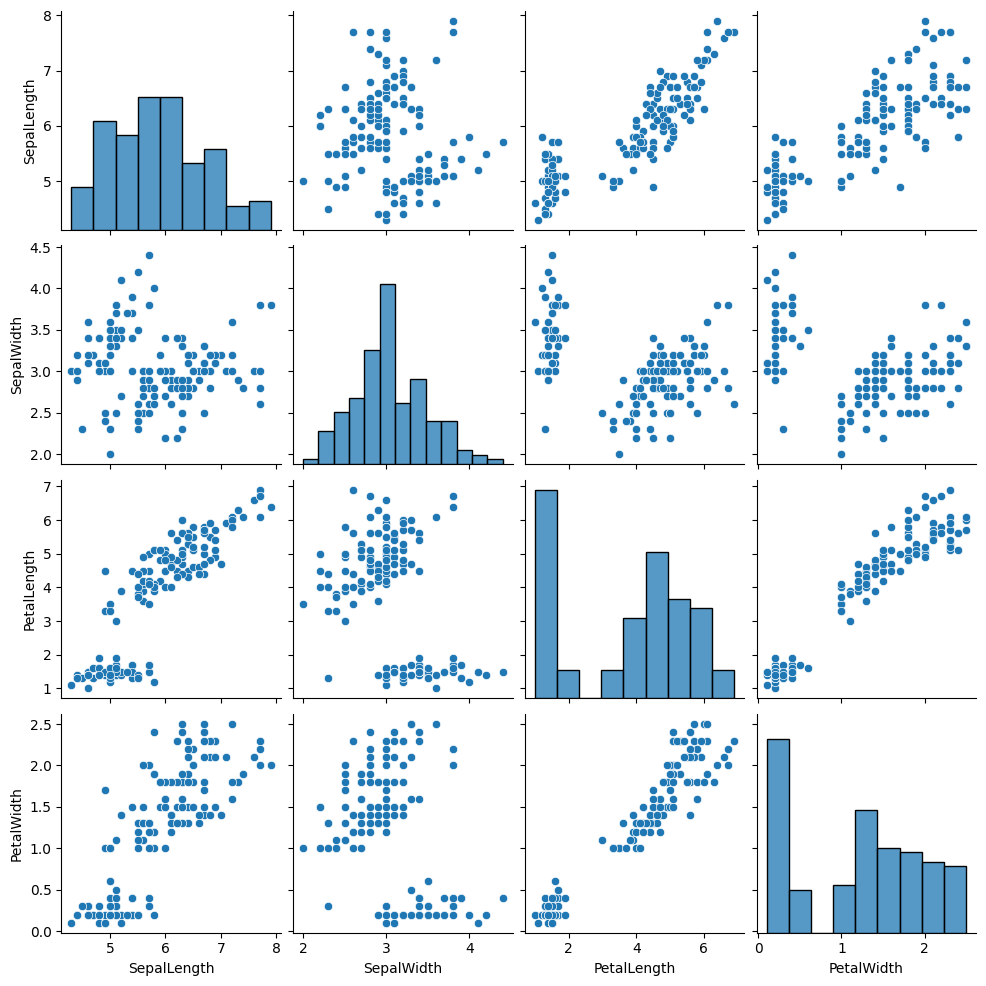

In [26]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [27]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [28]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print(labels,centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] [[0.545      0.36333333 0.6620339  0.65666667]
 [0.19611111 0.59083333 0.07864407 0.06      ]]


In [29]:
print(inertia)

12.143688281579719


In [30]:
silhouette_scaled = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print(silhouette_scaled)

0.6294675561906644


### Try different k

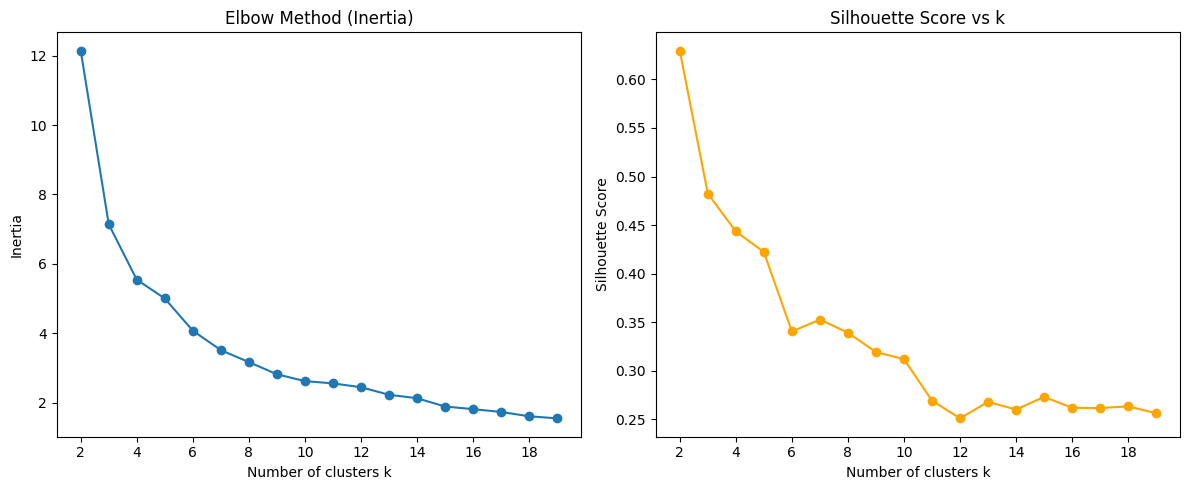

In [31]:
import matplotlib.ticker as ticker

inertias = []
silhouette_scores = []

K_range = range(2, 20)

for k in K_range:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    labels = kmeans.labels_
    inertia = kmeans.inertia_
    sil_score = metrics.silhouette_score(X_scaled, labels, metric='euclidean')

    inertias.append(inertia)
    silhouette_scores.append(sil_score)

# plotting
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

As we increase k from 2, the inertia continues to decrease, but at a slower rate. Meanwhile, the Silhouette Score also declines.

### Try not scale features

In [34]:
# use original features
X = df[cols]

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_

inertia_noscale = kmeans.inertia_
silhouette_noscale = metrics.silhouette_score(X, labels, metric='euclidean')

print("With scaling:")
print("Inertia:", inertia)
print("Silhouette Score:", silhouette_scaled)
print()
print("Without scaling:")
print("Inertia:", inertia_noscale)
print("Silhouette Score:", silhouette_noscale)

With scaling:
Inertia: 1.5434289815264384
Silhouette Score: 0.6294675561906644

Without scaling:
Inertia: 152.36870647733915
Silhouette Score: 0.6808136202936816


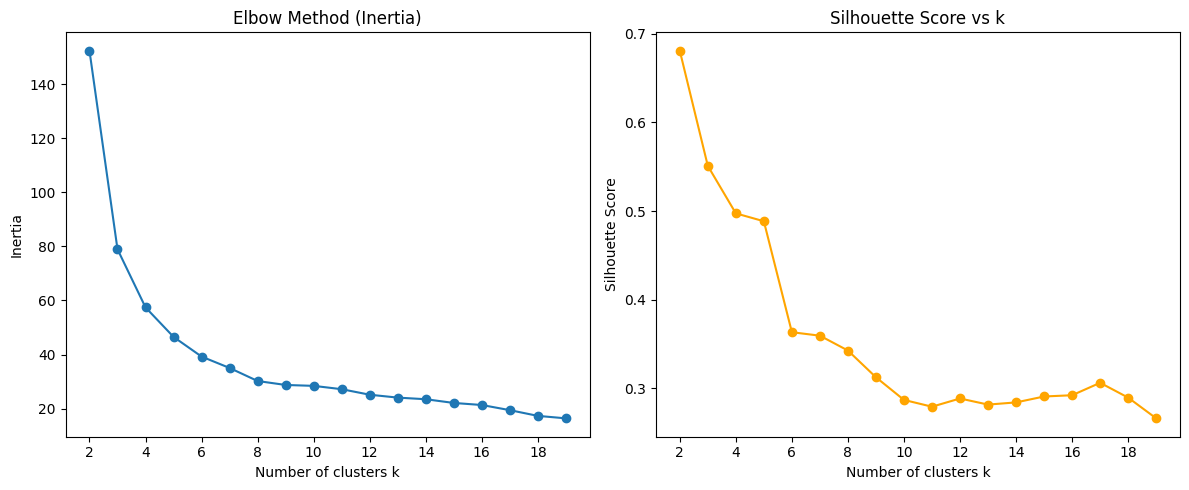

In [20]:
inertias = []
silhouette_scores = []

K_range = range(2, 20)

for k in K_range:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    labels = kmeans.labels_
    inertia = kmeans.inertia_
    sil_score = metrics.silhouette_score(X, labels, metric='euclidean')

    inertias.append(inertia)
    silhouette_scores.append(sil_score)

# plotting
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method (Inertia) Without Scale')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs k Without Scale')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

If we do not scale the features, the inertia is much higher compared to when the features are scaled. For example, when k=2, the inertia is 1.54 with scaled data but 152.36 with non-scaled data. However, the Silhouette Scores are similar in both cases.

### Is there a 'right' k? Why or why not?
No, there is no "right" k. The optimal k depends on the purpose of the classification. Additionally, there are various evaluation metrics available, and different methods may suggest different k values based on their focus.